# Problem 1

In [7]:
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')


def multiple_shooting(dynamics, x0, xf, lamb0_guess, K, t0, tf, is_print=False):

    def objective(change):
        if is_print:
            print("\nDecision vector: ", change)
        lamb0 = change[0]
        dd = change[1:]
        ptot0 = np.reshape(dd, [2*nx, K-1])
        points = 100

        tau_vec = np.empty([K, points])
        states = np.empty([K, points])
        E_array = np.empty([K-1, nx*2])
        for k in range(K):
            if k == 0:
                p0 = [x0, lamb0]  # interval initial conditions
            else:
                p0 = ptot0[:, k-1]
            tau_eval = np.linspace(tau[k], tau[k+1], points)
            sol = solve_ivp(dynamics, [tau_eval[0], tau_eval[-1]],
                            p0, t_eval=tau_eval, args=(t0, tf), dense_output=True)
            tau_vec[k] = sol.t
            states[k] = sol.y[:][0]
            final_states = [xi[-1] for xi in sol.y[:]]
            if k < K-1:
                ptots_end = ptot0[:, k]
                E_array[k, :] = final_states - ptots_end
        E_array = np.reshape(E_array, 2*nx*(K-1))
        E_array = np.append(E_array, sol.y[:][0][-1] - xf)

        return E_array

    nx = 1

    tau = np.linspace(-1, 1, K+1)
    ptot0guess = np.zeros([2*nx, K-1])
    ptot0guess[1, 0] = 5
    ptot0guess[1, 1] = 8
    reshaped = np.reshape(ptot0guess, 2*nx*(K-1))
    changing = np.concatenate([[lamb0_guess], reshaped])

    solution, obj_dict, ier, mesg = fsolve(
        objective, changing, xtol=10e-8, full_output=True)
    print("Solution found? ", ier)
    print("msg: ", mesg)
    print("n func calls: ", obj_dict["nfev"])

    lambda_sol = solution[0]
    ptot_sol = np.reshape(solution[1:], [2*nx, K-1])
    points = 100   # number of points to solve for in the integration
    tau_vec = np.empty([K, points])
    x_state = np.empty([K, points])
    for k in range(K):
        if k == 0:
            p0 = [x0, lambda_sol]  # interval initial conditions
        else:
            p0 = ptot_sol[:, k-1]
        tau_eval = np.linspace(tau[k], tau[k+1], points)
        sol = solve_ivp(dynamics, [tau_eval[0], tau_eval[-1]],
                        [p0[0], p0[1]], t_eval=tau_eval, args=(t0, tf), dense_output=True)
        x = sol.y[:]
        tau_vec[k] = sol.t
        x_state[k] = x[0]

    plt.figure(figsize=(10, 8))
    plt.plot(np.reshape(tau_vec, K*points), np.reshape(x_state, K*points))
    plt.xlabel('tau (s)')
    plt.ylabel('x')
    plt.title(f'obj vector={solution}')
    plt.show()


def dynamics(t, s, tinitial, tfinal):
    return (tfinal - tinitial)*np.dot(np.array([[-1, -1], [-1, 1]]), s)/2

## $t_f = 20$

Solution found?  1
msg:  The solution converged.
n func calls:  13


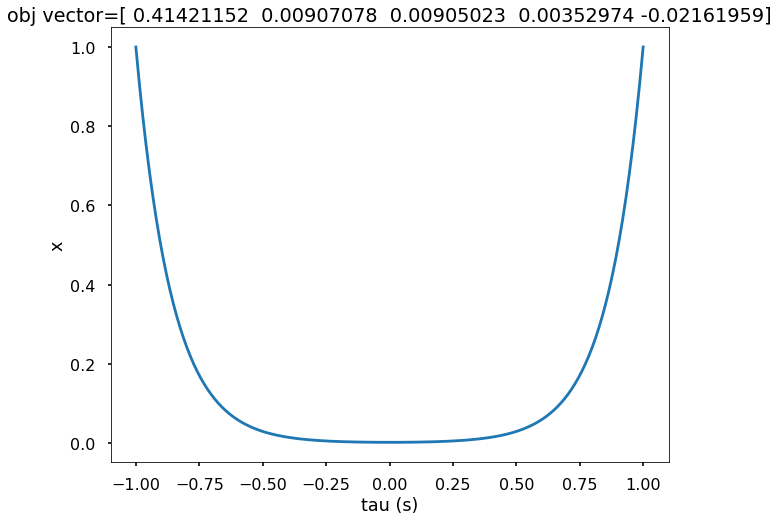

In [2]:
x0 = 1
xf = 1
lamb0_guess = 20  # guess

K = 3

t0 = 0
tf = [10, 20, 30, 40, 50]

multiple_shooting(dynamics, x0, xf, lamb0_guess, K, t0, tf[0])

## $t_f = 50$

Solution found?  1
msg:  The solution converged.
n func calls:  50


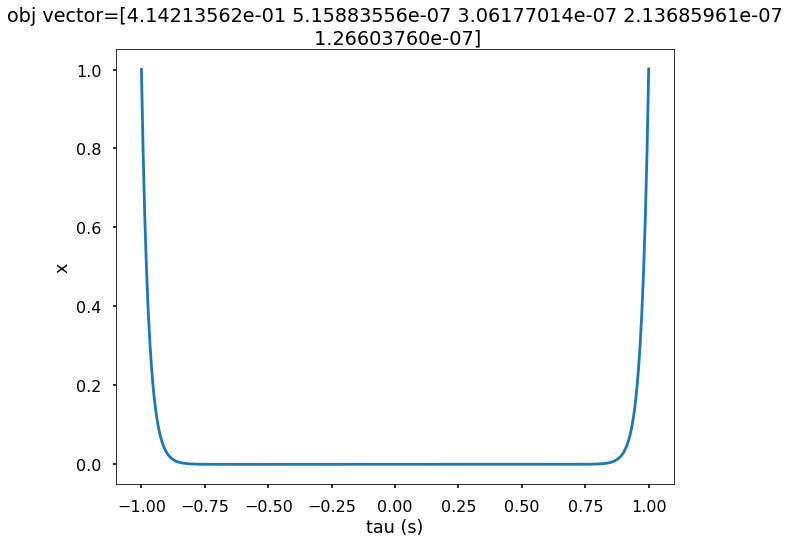

In [3]:
x0 = 1
xf = 1
lamb0_guess = 20  # guess

K = 3

t0 = 0
tf = [10, 20, 30, 40, 50]

multiple_shooting(dynamics, x0, xf, lamb0_guess, K, t0, tf[4])

### Evolution of guessses 


Decision vector:  [20.  0.  0.  5.  8.]

Decision vector:  [20.  0.  0.  5.  8.]

Decision vector:  [20.  0.  0.  5.  8.]

Decision vector:  [20.0000003  0.         0.         5.         8.       ]

Decision vector:  [2.00000000e+01 1.49011612e-08 0.00000000e+00 5.00000000e+00
 8.00000000e+00]

Decision vector:  [2.00000000e+01 0.00000000e+00 1.49011612e-08 5.00000000e+00
 8.00000000e+00]

Decision vector:  [20.          0.          0.          5.00000007  8.        ]

Decision vector:  [20.          0.          0.          5.          8.00000012]

Decision vector:  [2.99615753e+00 5.56323138e+00 3.91588933e+03 6.59909976e-01
 3.85132329e+03]

Decision vector:  [1.99631118e+00 9.41628016e+00 2.42559451e+03 4.26095584e+00
 1.31251912e+03]

Decision vector:  [20.0000003  0.         0.         5.         8.       ]

Decision vector:  [2.00000000e+01 1.49011612e-08 0.00000000e+00 5.00000000e+00
 8.00000000e+00]

Decision vector:  [2.00000000e+01 0.00000000e+00 1.49011612e-08 5.00000000e+0

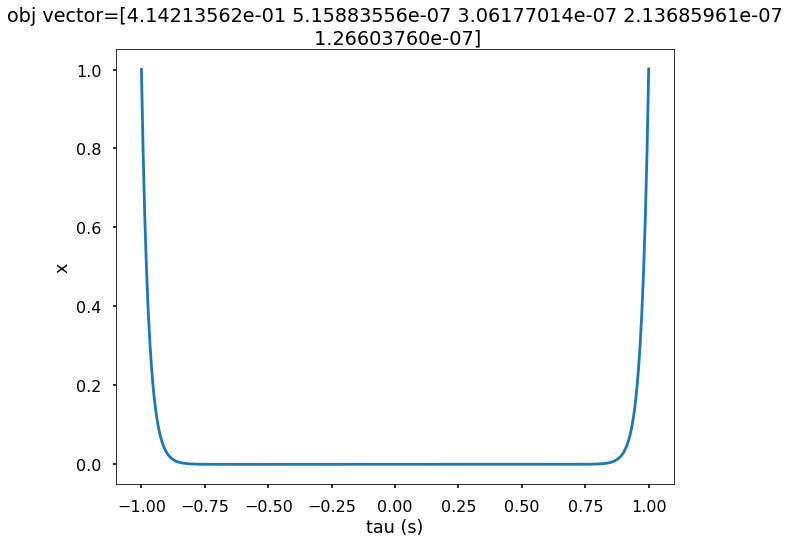

In [8]:
multiple_shooting(dynamics, x0, xf, lamb0_guess, K, t0, tf[4], is_print=True)